# RockAbusers Solution

## Authors: Arkhat Kalbekov & Valeria Suarez 

### Data Input & Code setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Input data files
sample_submission = pd.read_csv("Data/Data3_1_2020/sample_submission.csv")
test = pd.read_csv("Data/Data3_1_2020/test.csv")
all_feat = test.columns
train = pd.read_csv("Data/Data3_1_2020/train.csv")
real = pd.read_csv('Data/Data3_1_2020/real_result_20perc.csv')

In [3]:
#Variable set up

## Gamma Ray
GR = 'GR' 
## Caliper
CALI = 'CAL'  
## Resistivity
RDEEP = 'HRD'# deep resistivity
RMED = 'HRM' # medium resistivity
LOG_RDEEP = 'LOG_RDEEP'
LOG_RMED = 'LOG_RMED'
## Porosity
CNS  = 'CNC' #neutron porosity
RHOB  = 'ZDEN' # bulk density
## PEF
PE  = 'PE' #neutron porosity   
## DTC
DTC = 'DTC' 
DTS = 'DTS'
rhob = r'$\rho_b, g/cc$'
nphi = r'$\phi_N$, v/v'
dt =  r'$\Delta t$, us/ft'


In [4]:
#Feature set up

index_min = 13400
index_max = 19000
ntrees = 60
leaf = 10
features_1 = [CNS, RHOB, PE]
features_2 = [CNS, RHOB, PE]

In [5]:
# Drop of error values
for i in range(19939, 30143):
    train.PE[i] = train.PE[i]*100

df = train.drop(train[train[CNS]==-999.0].index)
df = df.drop(df[df[RHOB]==-999.0].index)
#df = df.drop(df[df[DTC]==-999.0].index)
df = df.drop(index=[27977,27978,27979,27980,27981,27982])
df = df.drop(df[df[GR]==-999.0].index)


### Plot function

In [6]:
import pylab
from mpl_toolkits import mplot3d
from matplotlib.ticker import ScalarFormatter



def plotalllogs(dataframe):
#=============================================================================    
    tracks=6
    linewidth=0.4
    ## Gamma Ray
    trackGR=0 #Gamma Ray
    ## Gamma Ray
    trackCALI=1 #Gamma Ray
    ## Resistivity
    trackRes=2
    ## Porosity
    trackPOR = 3
    ## PEF
    trackPE = 4 
    ## DTC
    trackDTC=5
#=============================================================================    
    pylab.rcParams.update({'font.size': 13, 'font.family': 'serif', 'figure.figsize': (10,20)})
    fig,axes = plt.subplots(1,tracks,sharey=True,figsize=(15,15), dpi=100) ##sharey: share y axis
    fig.gca().invert_yaxis()
# =============================================================================
#================================================
    ## GR
    ax1 = axes[trackGR]
    ax1.grid(which='both')
    ax1.plot(dataframe[GR],dataframe.index, label='GR', color='green', lw=linewidth)
    ax1.set_xlabel('GR, GAPI')
    ax1.set_xlim(0,400)
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    ## CALI
    ax2 = axes[trackCALI]
    ax2.grid(which='both')
    ax2.plot(dataframe[CALI],dataframe.index, label='CALI', color='black', lw=linewidth)
    ax2.set_xlabel('CALI, IN')
    ax2.set_xlim(0,20)
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')    
   
    # Resistivity   
    ax3 = axes[trackRes]
    ax3.set_xscale('log')
    ax3.grid(which='both')
    ax3.plot(dataframe[RDEEP],dataframe.index, label=RDEEP, color='red', lw=linewidth)
    ax3.plot(dataframe[RMED],dataframe.index, label=RMED,color='black', ls = '--', lw=linewidth)
    ax3.set_xlabel('Resistivity, ohm.m')
    ax3.legend(loc=1)
    ax3.set_xlim(0.2,2000)
    ax3.xaxis.set_ticks_position('top')
    ax3.xaxis.set_label_position('top')
    ax3.set_xticks([1, 10, 100, 1000])
    ax3.xaxis.set_major_formatter(ScalarFormatter())
# =============================================================================

    ## RHOB
    ax4 = axes[trackPOR].twiny()
    ax4.plot(dataframe[RHOB],dataframe.index, label=r'$\rho_b$', color='red', lw=linewidth)
    ax4.set_xlabel(r'$\rho_b, g/cc$')
    ax4.set_xlim(1.5,3)
    #ax4.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])
    ax4.spines['top'].set_position(('outward', 40))
    #ax4.spines['top'].set_edgecolor('red')
    ax4.xaxis.set_ticks_position('top') # set the position of the second x-axis to top
    #ax4.tick_params(axis='x', colors='red')
    ax4.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax4.legend(bbox_to_anchor=(0.6, .9))
    ##NPHI
    ax5 = axes[trackPOR]
    ax5.grid(which='both')
    ax5.plot(dataframe[CNS],dataframe.index, label=r'$\phi_N$', color='blue', lw=linewidth)
    ax5.set_xlim(0.60, 0)
    ax5.set_xlabel(r'$\phi_N$, %') 
    ax5.legend(bbox_to_anchor=(0.6, 1))
    ax5.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax5.xaxis.set_ticks_position('top')
    ax5.set_xticks([0.6, 0.45, 0.3, 0.15, 0])
    ##PE
    ax6 = axes[trackPE]
    ax6.grid(which='both')
    ax6.plot(dataframe[PE],dataframe.index, label=PE, lw=linewidth)
    ax6.set_xlabel('PE, barns/electron')
    ax6.set_xlim(-5,10)
    ax6.xaxis.set_ticks_position('top')
    ax6.xaxis.set_label_position('top')  
    
    ## DTC & DTS
    ax7 = axes[trackDTC]
    ax7.grid(which='both')
    ax7.plot(dataframe[DTC],dataframe.index, label=DTC, lw=linewidth)
    ax7.plot(dataframe[DTS],dataframe.index, label=DTS, lw=linewidth)
    ax7.set_xlabel(dt)
    ax7.set_xlim(500,40)
    ax7.xaxis.set_ticks_position('top')
    ax7.xaxis.set_label_position('top')
    

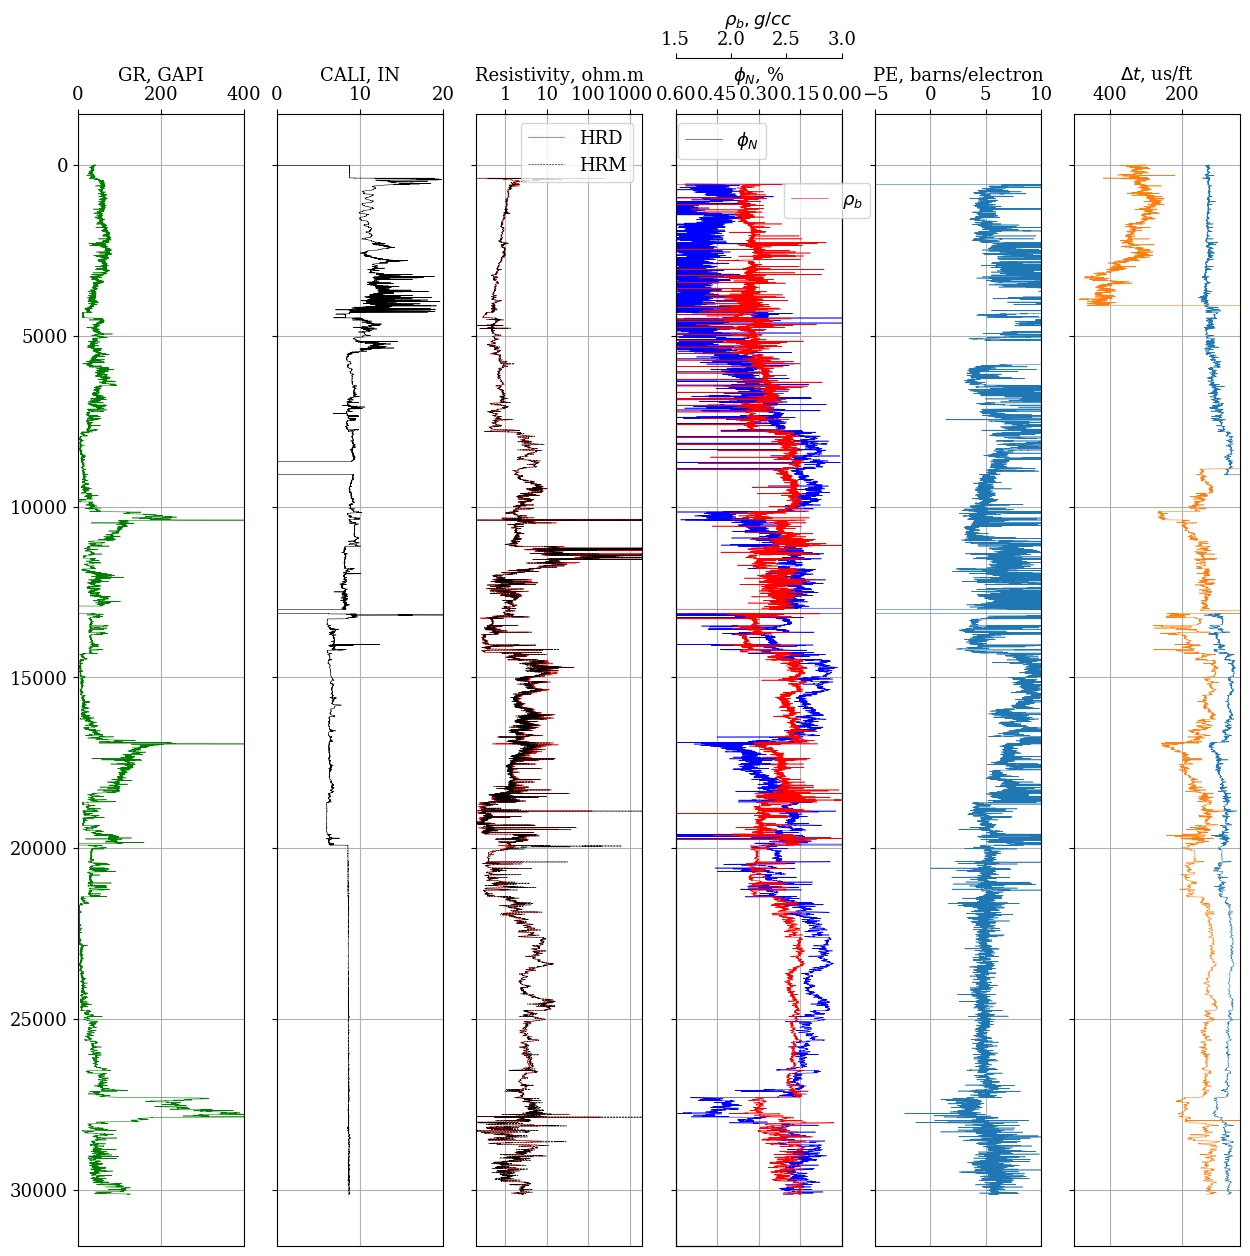

In [7]:
plotalllogs(train)

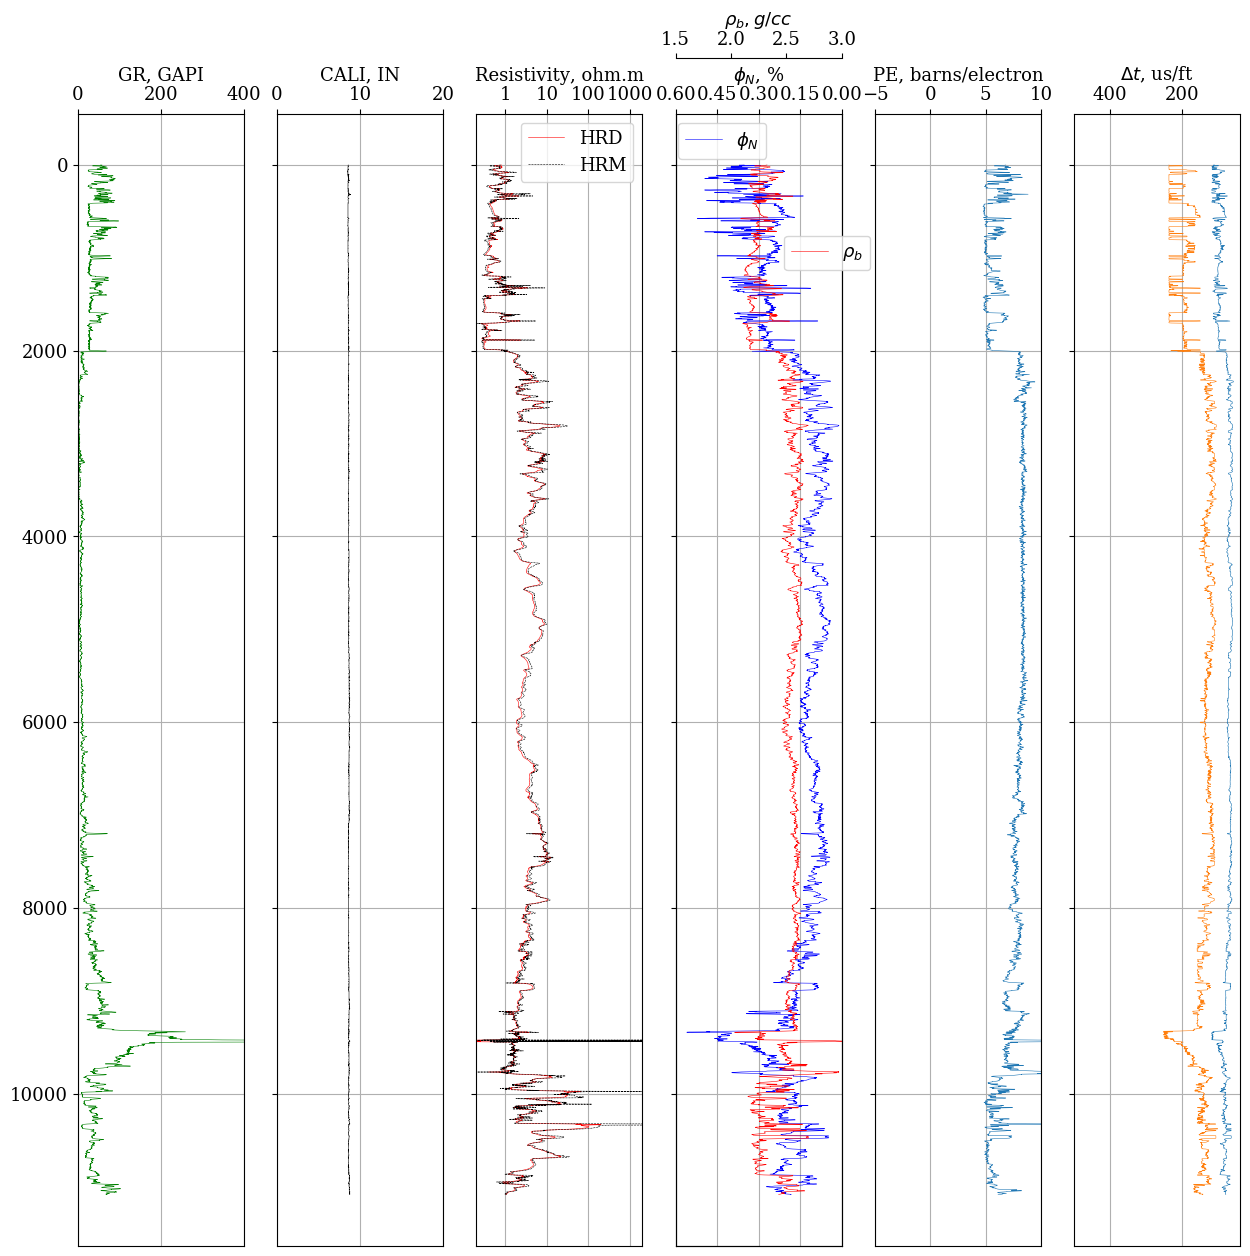

In [56]:
plotalllogs(test)

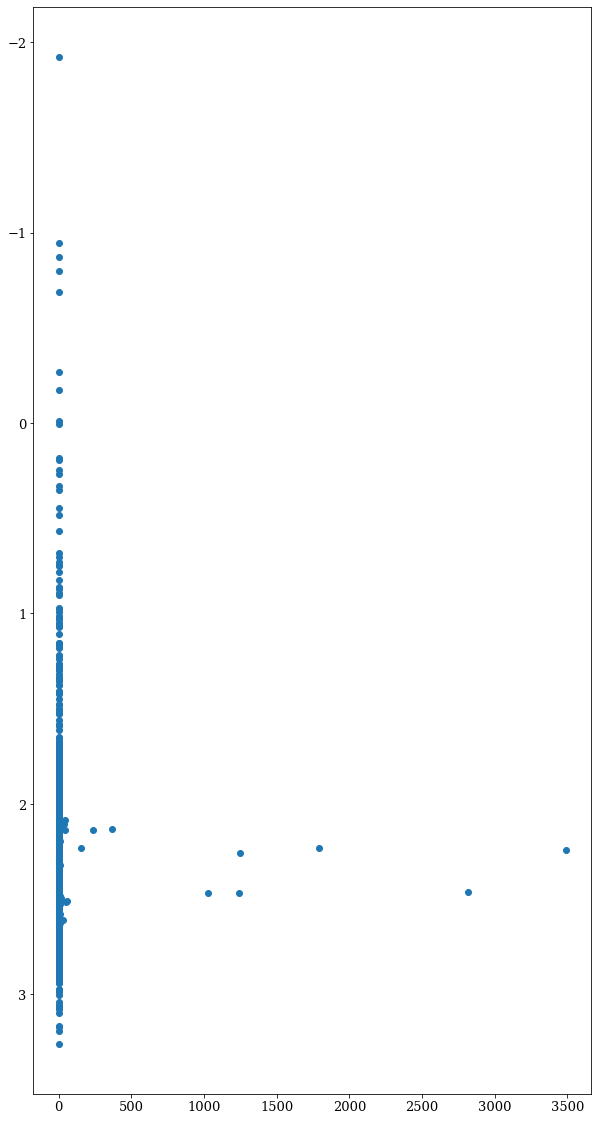

In [8]:
plt.scatter(df[CNS], df[RHOB])
plt.gca().invert_yaxis()

In [9]:
df = df[(df[CNS]<1)&(df[CNS]>-0.2)&(df[RHOB]<3)&(df[RHOB]>1.75)&(df[DTC]<160)&(df[DTC]>40)]

(-0.2, 1)

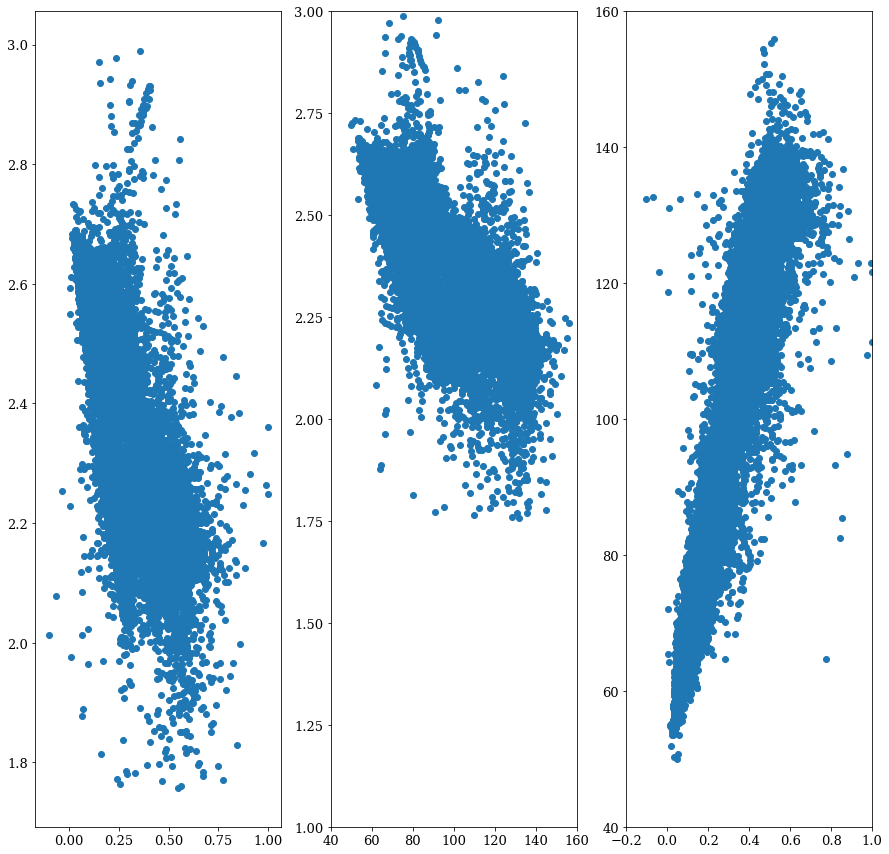

In [10]:
fig,axes = plt.subplots(1,3,figsize=(15,15))
ax1 = axes[0]
ax1.scatter(df[CNS], df[RHOB])
ax2 = axes[1]
ax2.scatter(df[DTC], df[RHOB])
ax2.set_ylim(1,3)
ax2.set_xlim(40,160)
ax3 = axes[2]
ax3.scatter(df[CNS], df[DTC])
ax3.set_ylim(40, 160)
ax3.set_xlim(-0.2,1)

### Normalizing for Outlier Detection

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)
df_minmax

array([[0.99393979, 0.56244898, 0.03821865, ..., 0.48141234, 0.71682618,
        0.87852117],
       [0.99401293, 0.54367347, 0.04228137, ..., 0.52564935, 0.71693466,
        0.87782629],
       [0.99369638, 0.4953288 , 0.04320867, ..., 0.56818182, 0.71580458,
        0.8778762 ],
       ...,
       [0.9878591 , 0.25414966, 0.08236748, ..., 0.69724026, 0.23115504,
        0.76122704],
       [0.98785145, 0.25142857, 0.08141282, ..., 0.69642857, 0.232254  ,
        0.76135782],
       [0.98785145, 0.25124717, 0.08132788, ..., 0.6961039 , 0.23335295,
        0.76148867]])

In [12]:
df_minmax = pd.DataFrame(df_minmax)
df_minmax.columns = df.columns
df_minmax.index=df.index
df_minmax.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
573,0.993940,0.562449,0.038219,0.008998,0.000030,0.994636,0.481412,0.716826,0.878521
574,0.994013,0.543673,0.042281,0.009311,0.000025,1.000000,0.525649,0.716935,0.877826
575,0.993696,0.495329,0.043209,0.009307,0.000022,0.950385,0.568182,0.715805,0.877876
576,0.993302,0.484082,0.042183,0.009109,0.000022,0.719227,0.538961,0.714705,0.877382
577,0.993091,0.498594,0.040704,0.008856,0.000022,0.400166,0.451218,0.716980,0.876893


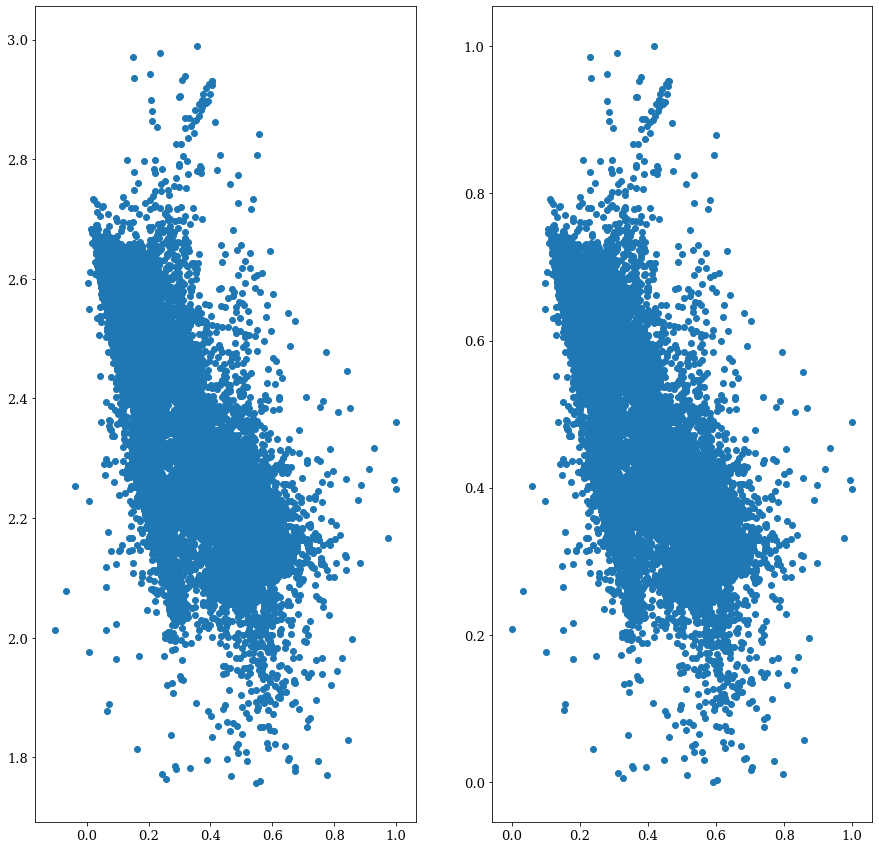

In [13]:
#Verifying that the space between points did not change after scaling
fig,axes = plt.subplots(1,2,figsize=(15,15))
ax1 = axes[0]
ax1.scatter(df[CNS], df[RHOB])
ax2 = axes[1]
ax2.scatter(df_minmax[CNS], df_minmax[RHOB])

### Outlier Detection

In [14]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(assume_centered=False, contamination=0.04, random_state=None,
                 store_precision=True, support_fraction=0.3)
cov.fit(df_minmax[[CNS, RHOB, DTC]])

EllipticEnvelope(assume_centered=False, contamination=0.04, random_state=None,
                 store_precision=True, support_fraction=0.3)

In [15]:
flag = cov.predict(df_minmax[[CNS, RHOB, DTC]]) 
flag

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
print(flag.shape)
print(df_minmax.shape)

(25262,)
(25262, 9)


In [17]:
FLAG = 'FLAG'
df_minmax[FLAG] = flag
df[FLAG] = df_minmax[FLAG]
df.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS,FLAG
573,14.8824,0.5173,57.1903,1.9826,1.9726,27.9432,2.3510,125.9611,306.8676,1
574,14.9570,0.4966,63.1593,2.0472,1.6373,28.1064,2.4055,125.9726,305.8347,1
575,14.6341,0.4433,64.5217,2.0464,1.4866,26.5968,2.4579,125.8528,305.9089,1
576,14.2318,0.4309,63.0144,2.0054,1.4613,19.5635,2.4219,125.7362,305.1737,1
577,14.0163,0.4469,60.8421,1.9533,1.4438,9.8556,2.3138,125.9774,304.4476,1


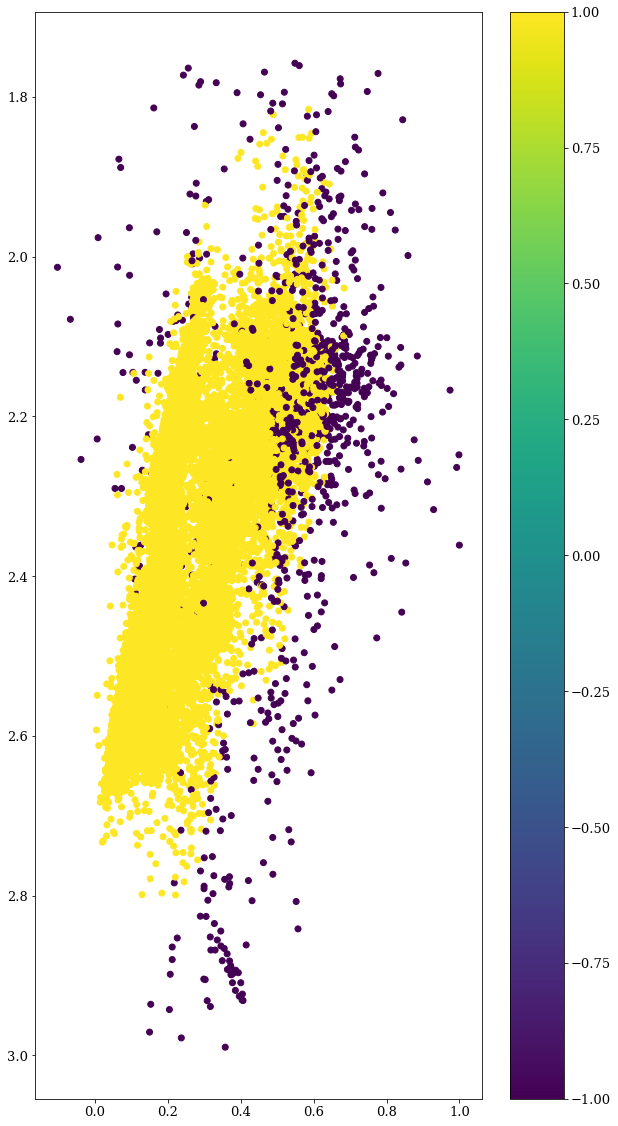

In [18]:
plt.scatter(df[CNS], df[RHOB], c=df[FLAG])
plt.gca().invert_yaxis()
plt.colorbar()

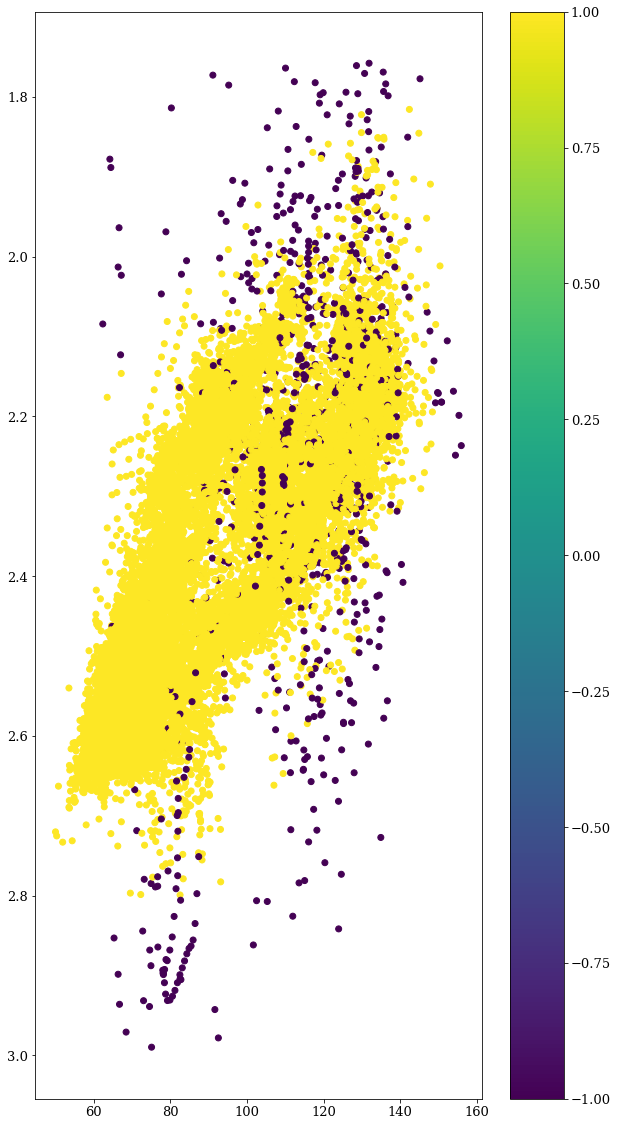

In [19]:
plt.scatter(df[DTC], df[RHOB],c=df[FLAG])
plt.gca().invert_yaxis()
plt.colorbar()

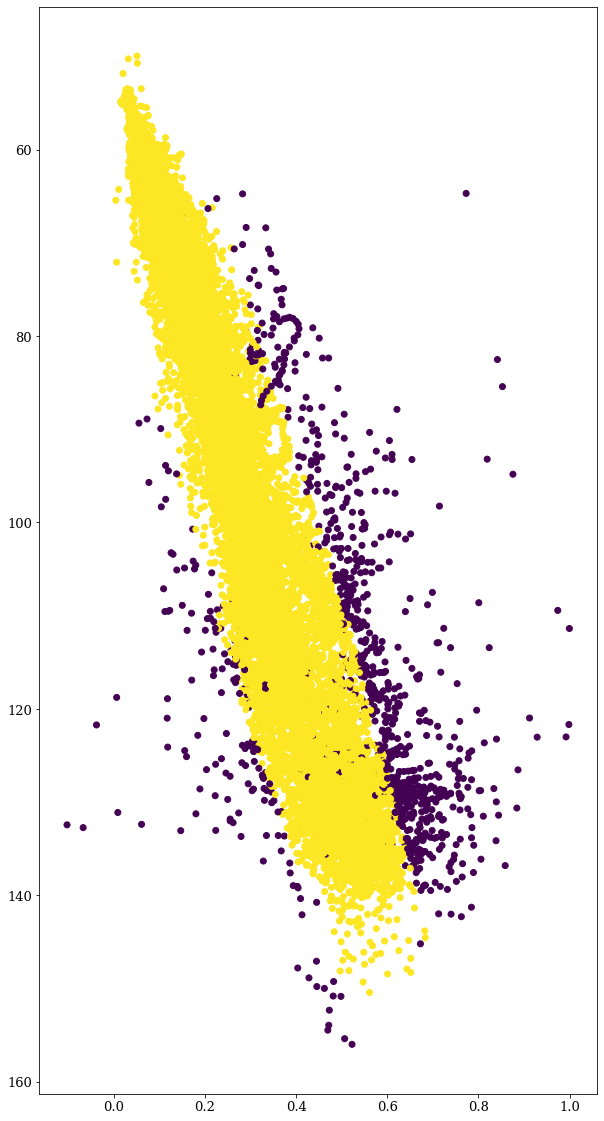

In [20]:
plt.scatter(df.CNC, df.DTC, c=df.FLAG)
plt.gca().invert_yaxis()

In [21]:
#df = df[df.FLAG==1]
#df.head()

# Please note that we decided not to use the data cleansed from outliers as  it gave us a worse RMSE

In [22]:
#Re initializing the dataframe
df = train.drop(train[train[CNS]==-999.0].index)
df = df.drop(df[df[RHOB]==-999.0].index)
#df = df.drop(df[df[DTC]==-999.0].index)
df = df.drop(index=[27977,27978,27979,27980,27981,27982])
df = df.drop(df[df[GR]==-999.0].index)

In [23]:
def plotalllogs1(dataframe, test):
#=============================================================================    
    tracks=6
    linewidth=0.4
    ## Gamma Ray
    trackGR1=0 #Gamma Ray
    ## Resistivity
    trackRes1=1
    ## Porosity
    trackPOR1=2
    ## Gamma Ray
    trackGR2=3 #Gamma Ray
    ## Resistivity
    trackRes2=4
    ## Porosity
    trackPOR2=5
#=============================================================================    
    pylab.rcParams.update({'font.size': 13, 'font.family': 'serif', 'figure.figsize': (10,20)})
    fig,axes = plt.subplots(1,tracks,sharey=True,figsize=(15,15), dpi=100) ##sharey: share y axis
    fig.gca().invert_yaxis()
# =============================================================================
#================================================
    ## GR-1
    ax1 = axes[trackGR1]
    ax1.grid(which='both')
    ax1.plot(dataframe[GR],dataframe.index, label='GR', color='green', lw=linewidth)
    ax1.set_xlabel('GR, GAPI')
    ax1.set_xlim(0,400)
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')  
    # Resistivity-1 
    ax2 = axes[trackRes1]
    ax2.set_xscale('log')
    ax2.grid(which='both')
    ax2.plot(dataframe[RDEEP],dataframe.index, label=RDEEP, color='red', lw=linewidth)
    ax2.plot(dataframe[RMED],dataframe.index, label=RMED,color='black', ls = '--', lw=linewidth)
    ax2.set_xlabel('Resistivity, ohm.m')
    ax2.legend(loc=1)
    ax2.set_xlim(0.2,2000)
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
    ax2.set_xticks([1, 10, 100, 1000])
    ax2.xaxis.set_major_formatter(ScalarFormatter())
# =============================================================================
    ## RHOB-1
    ax3 = axes[trackPOR1].twiny()
    ax3.plot(dataframe[RHOB],dataframe.index, label=r'$\rho_b$', color='red', lw=linewidth)
    ax3.set_xlabel(r'$\rho_b, g/cc$')
    ax3.set_xlim(1.5,3)
    #ax4.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])
    ax3.spines['top'].set_position(('outward', 40))
    #ax4.spines['top'].set_edgecolor('red')
    ax3.xaxis.set_ticks_position('top') # set the position of the second x-axis to top
    #ax4.tick_params(axis='x', colors='red')
    ax3.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax3.legend(bbox_to_anchor=(0.6, .9))
    ##NPHI-1
    ax4 = axes[trackPOR1]
    ax4.grid(which='both')
    ax4.plot(dataframe[CNS],dataframe.index, label=r'$\phi_N$', color='blue', lw=linewidth)
    ax4.set_xlim(0.60, 0)
    ax4.set_xlabel(r'$\phi_N$, %') 
    ax4.legend(bbox_to_anchor=(0.6, 1))
    ax4.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax4.xaxis.set_ticks_position('top')
    ax4.set_xticks([0.6, 0.45, 0.3, 0.15, 0])
     ## GR-2
    ax5 = axes[trackGR2]
    ax5.grid(which='both')
    ax5.plot(test[GR],test.index, label='GR', color='green', lw=linewidth)
    ax5.set_xlabel('GR, GAPI')
    ax5.set_xlim(0,400)
    ax5.xaxis.set_ticks_position('top')
    ax5.xaxis.set_label_position('top')  
    # Resistivity-2   
    ax6 = axes[trackRes2]
    ax6.set_xscale('log')
    ax6.grid(which='both')
    ax6.plot(test[RDEEP],test.index, label=RDEEP, color='red', lw=linewidth)
    ax6.plot(test[RMED],test.index, label=RMED,color='black', ls = '--', lw=linewidth)
    ax6.set_xlabel('Resistivity, ohm.m')
    ax6.legend(loc=1)
    ax6.set_xlim(0.2,2000)
    ax6.xaxis.set_ticks_position('top')
    ax6.xaxis.set_label_position('top')
    ax6.set_xticks([1, 10, 100, 1000])
    ax6.xaxis.set_major_formatter(ScalarFormatter())
# =============================================================================
    ## RHOB-2
    ax7 = axes[trackPOR2].twiny()
    ax7.plot(test[RHOB],test.index, label=r'$\rho_b$', color='red', lw=linewidth)
    ax7.set_xlabel(r'$\rho_b, g/cc$')
    ax7.set_xlim(1.5,3)
    #ax4.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])
    ax7.spines['top'].set_position(('outward', 40))
    #ax4.spines['top'].set_edgecolor('red')
    ax7.xaxis.set_ticks_position('top') # set the position of the second x-axis to top
    #ax4.tick_params(axis='x', colors='red')
    ax7.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax7.legend(bbox_to_anchor=(0.6, .9))
    ##NPHI-2
    ax8 = axes[trackPOR2]
    ax8.grid(which='both')
    ax8.plot(test[CNS],test.index, label=r'$\phi_N$', color='blue', lw=linewidth)
    ax8.set_xlim(0.60, 0)
    ax8.set_xlabel(r'$\phi_N$, %') 
    ax8.legend(bbox_to_anchor=(0.6, 1))
    ax8.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax8.xaxis.set_ticks_position('top')
    ax8.set_xticks([0.6, 0.45, 0.3, 0.15, 0])

In [24]:
#Log scale for resistivity logs

df[LOG_RDEEP] = np.log10(df[RDEEP])
df[LOG_RMED] = np.log10(df[RMED])
test[LOG_RDEEP] = np.log10(test[RDEEP])
test[LOG_RMED] = np.log10(test[RMED])

#Defining working dataframe
df1 = df[(df.index < index_max) & (df.index >= index_min)]

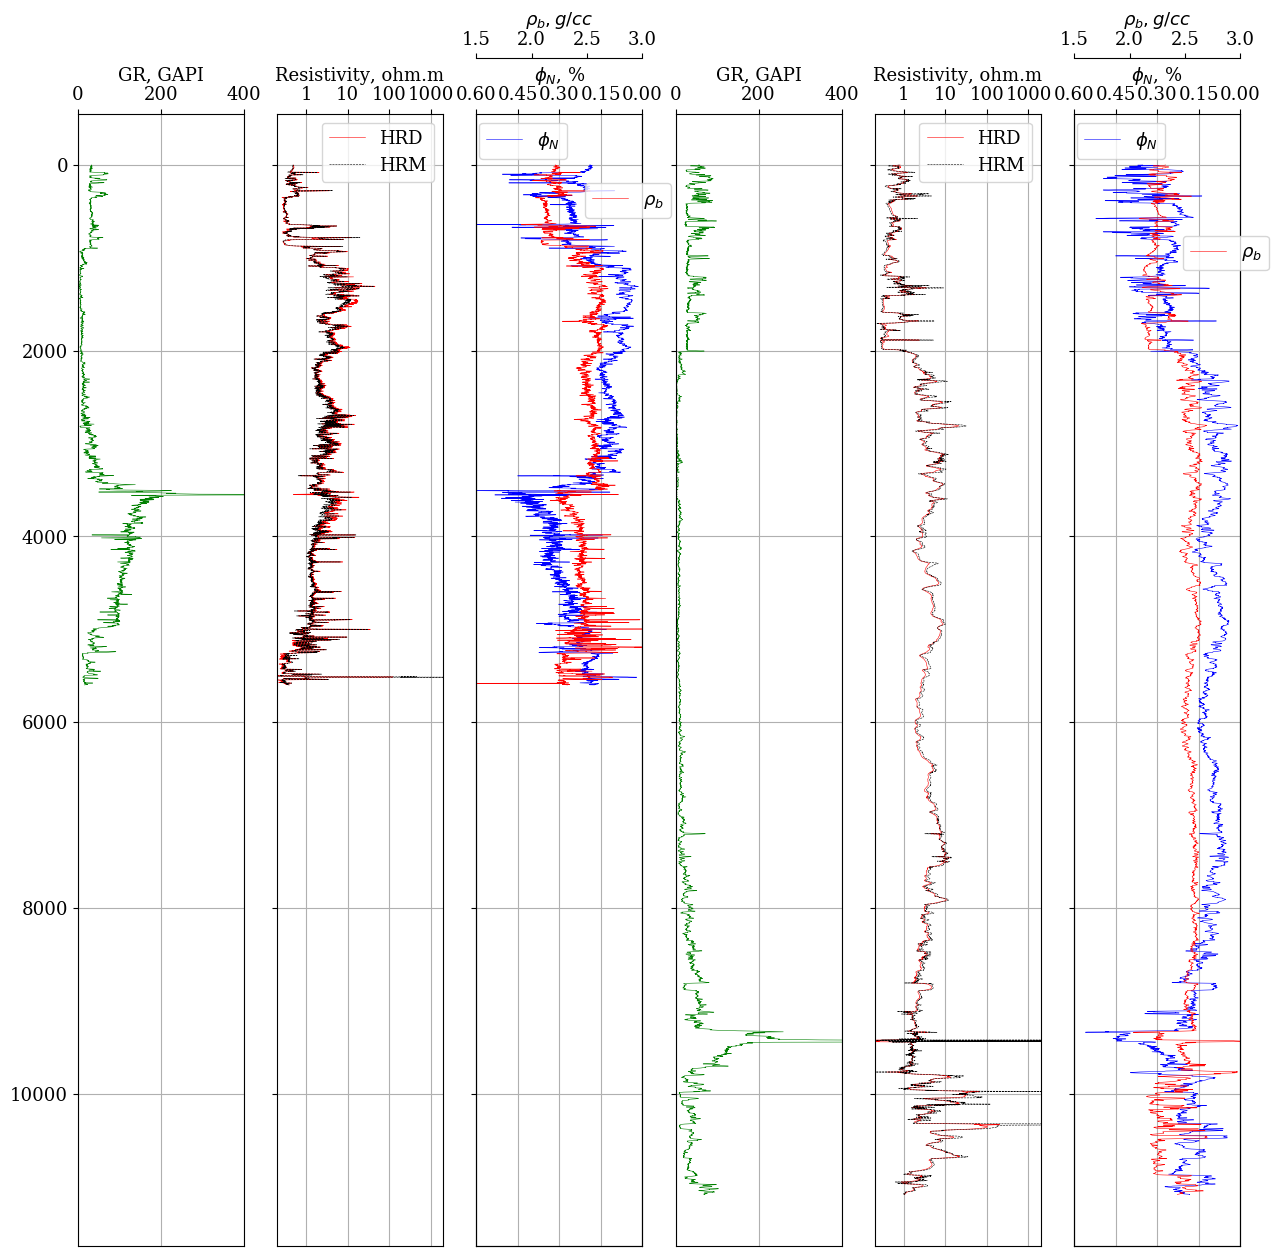

In [25]:
#We decided to train the model taking observations only for zones that are similar to the one in the test dataset. 
#For convenience, we are plotting train data and test data side-to-side so that one can see correlation between datasets
#First three tracks on the left belong to train dataset, and last three are for test dataset.
#Despite the fact that sampling rate for the training dataset seem to be less two sets correlate well.
df11 = df1.reset_index()
test1 = test.reset_index()
plotalllogs1(df11, test1)

### Random Forest Regressor

In [26]:
# Set up X and Y data for training 

y1 = np.array(df1.DTC)
y2 = np.array(df1.DTS)

X1 = np.array(df1[features_1])
X2 = np.array(df1[features_2])

#Features used CNS, RHOB and PE

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


#RFR Model for DTC
rf_reg = RandomForestRegressor(n_estimators = 4000, min_samples_leaf=54, min_samples_split=100, random_state=100, max_leaf_nodes=500, max_features='log2')

#Model Fit
RF1 = rf_reg.fit(X1, y1)
yHat1 = RF1.predict(X1)

#DTC Model Prediction
X1 = np.array(test[features_1])

DTC_pred = RF1.predict(X1)
test[DTC] = DTC_pred

In [28]:
#RFR Model for DTS
rf_reg = RandomForestRegressor(n_estimators = 4000, min_samples_leaf=54, min_samples_split=100, random_state=100, max_leaf_nodes=500)

#Model Fit
RF2 = rf_reg.fit(X2, y2)
yHat2 = RF2.predict(X2)

#DTS Model Prediction
X2 = np.array(test[features_2])

DTS_pred = RF2.predict(X2)
test[DTS] = DTS_pred

In [29]:
#RFR Model for Top section of the DTS log

#Since we were getting bad rmse results with the first model, especially the problem was with DTS, we decided to predict problematic DTS zones separately.
#We came up with different zones for top and bottom zones of the test dataset. (only for DTS)
#Also, we used different features set for top and bottom zones as these zones contain some hydrocarbons based on crossovers in density-neutron curves. 
#We decided that resistivity can be contributing more in these zones thus added them into features list.

#Selection of the top section of the log
test_top = test.loc[0:2000]
real_top = real.loc[0:2000]

#Defining dataframe and arrays used for model
df2 = df[(df.index >= 13250) & (df.index < 13900)]
feat = [GR, CNS, PE, RDEEP]
X_top = np.asarray(df2[feat])
y_top = np.asarray(df2[DTS])




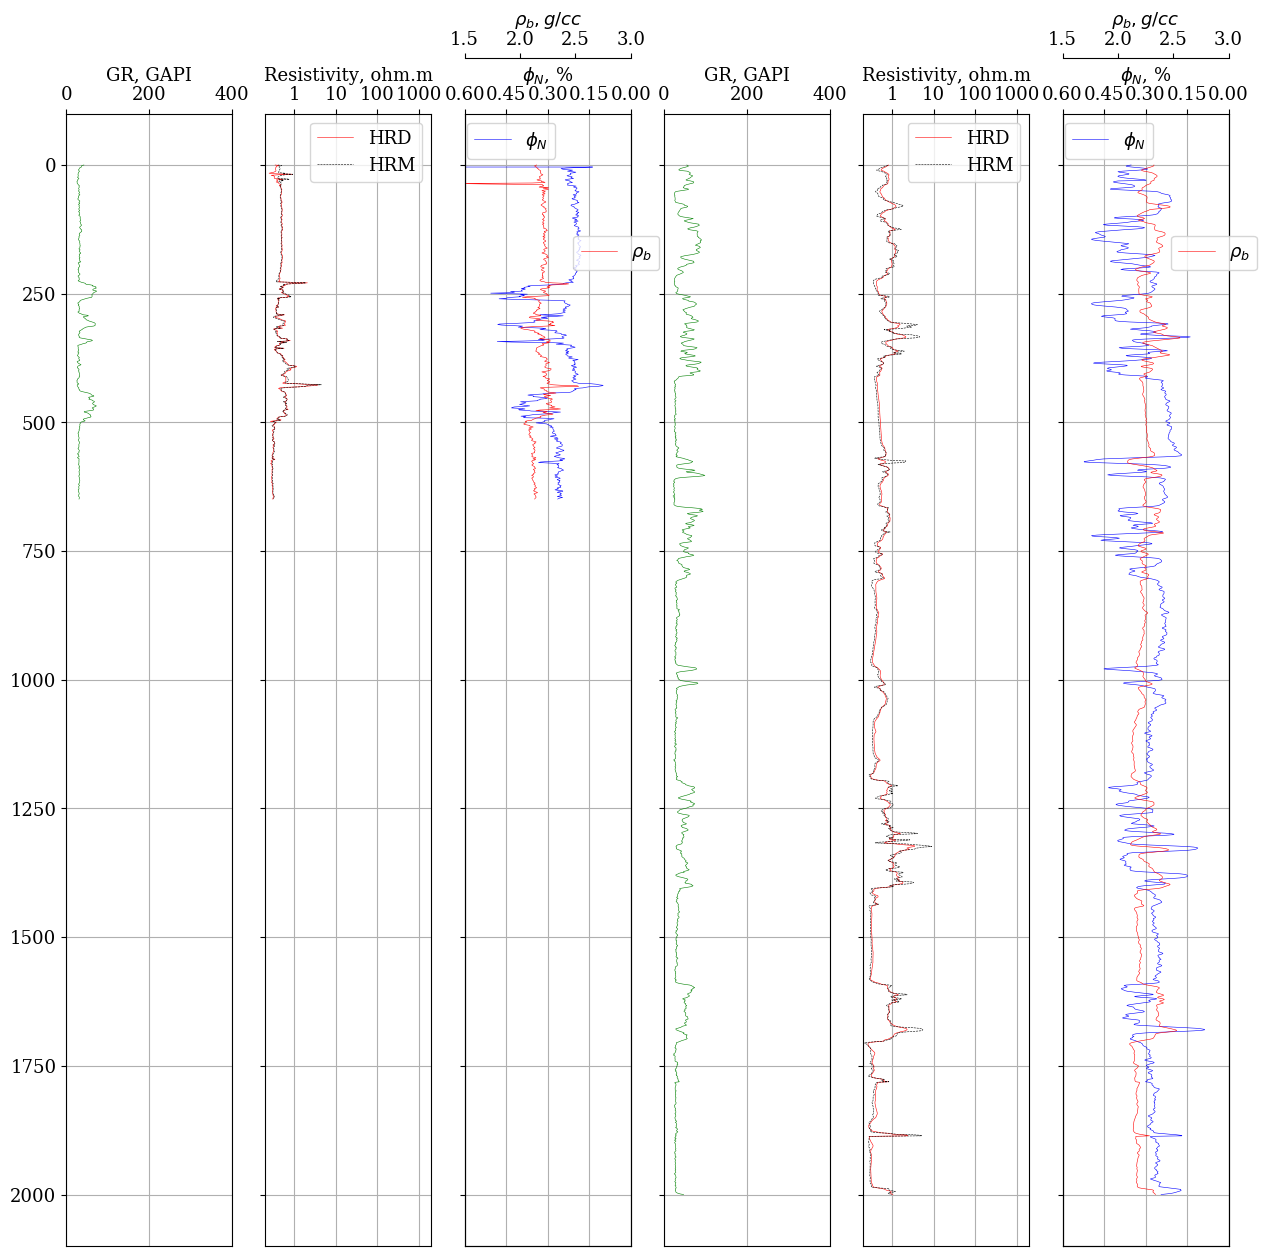

In [30]:
#plot them together with resetting index just for convenience in comparison
#Specially picked zone from train dataset correlates somewhat with the top part of test data (0-2000).
df22 = df2.reset_index()
test_top1 = test_top.reset_index()
plotalllogs1(df22, test_top1)

In [31]:
#RFR Model for top section of the log
rf = RandomForestRegressor(n_estimators = 4000, min_samples_leaf=54, min_samples_split=10, random_state=10, max_leaf_nodes=500)

#Model Fit
RF_top = rf.fit(X_top, y_top)

#Model prediction
X_top = np.array(test_top[feat])
DTS_top = RF_top.predict(X_top)

#Replacing results in main result vector
test_top[DTS] = DTS_top
test.loc[0:2000] = test_top


D:\Software\Python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [32]:
#RFR Model for Bottom section of the DTS log

#Selection of the bottom section of the log
test_bot = test.loc[9275:11088]
real_bot = real.loc[9275:11088]

#Defining dataframe and arrays used for model.
feat_b = [GR, CNS, PE, RMED]

df3_DTS_1 = df[(df.index >= 10085) & (df.index < 12001)].reset_index()
df3_DTS_2 = df[(df.index >= 16822) & (df.index < 19000)].reset_index()
df3_DTS = pd.concat([df3_DTS_1, df3_DTS_2], axis=0)

X_DTS_bot = np.asarray(df3_DTS[feat_b])
y_DTS_bot = np.asarray(df3_DTS[DTS])



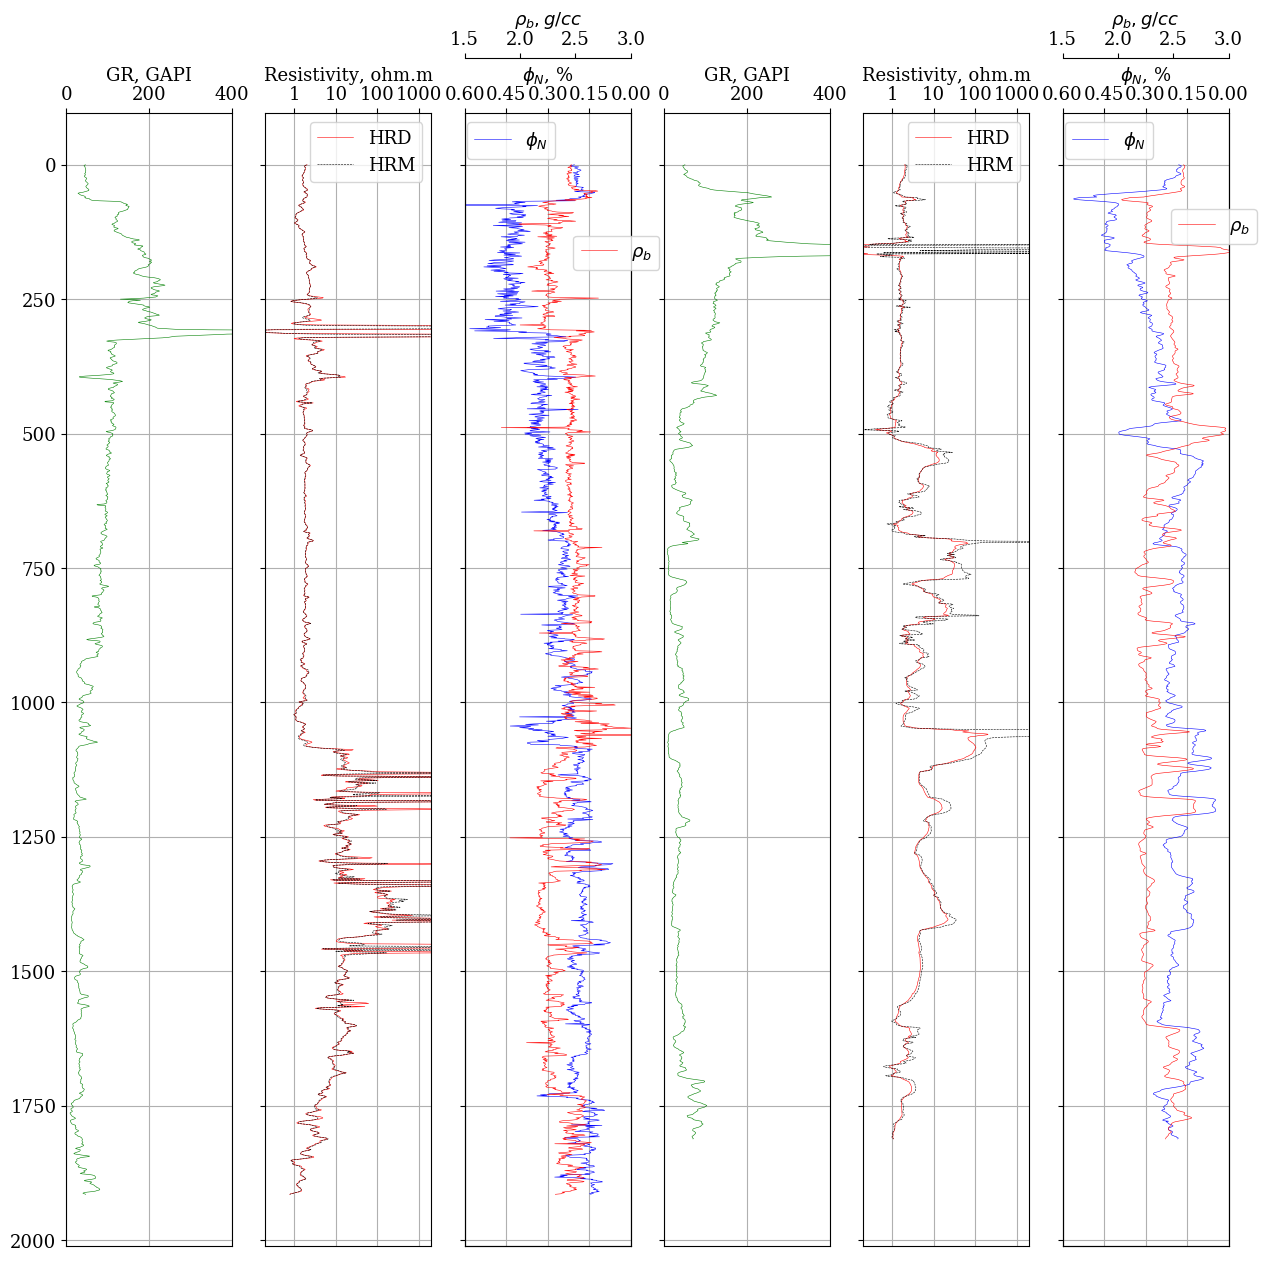

In [33]:
#plot them together with resetting index just for convenience in comparison
#Specially picked zone from train dataset correlates somewhat with the top part of test data (9275-11088).
df33_1 = df3_DTS_1.reset_index()
test_bot1 = test_bot.reset_index()
plotalllogs1(df33_1, test_bot1)

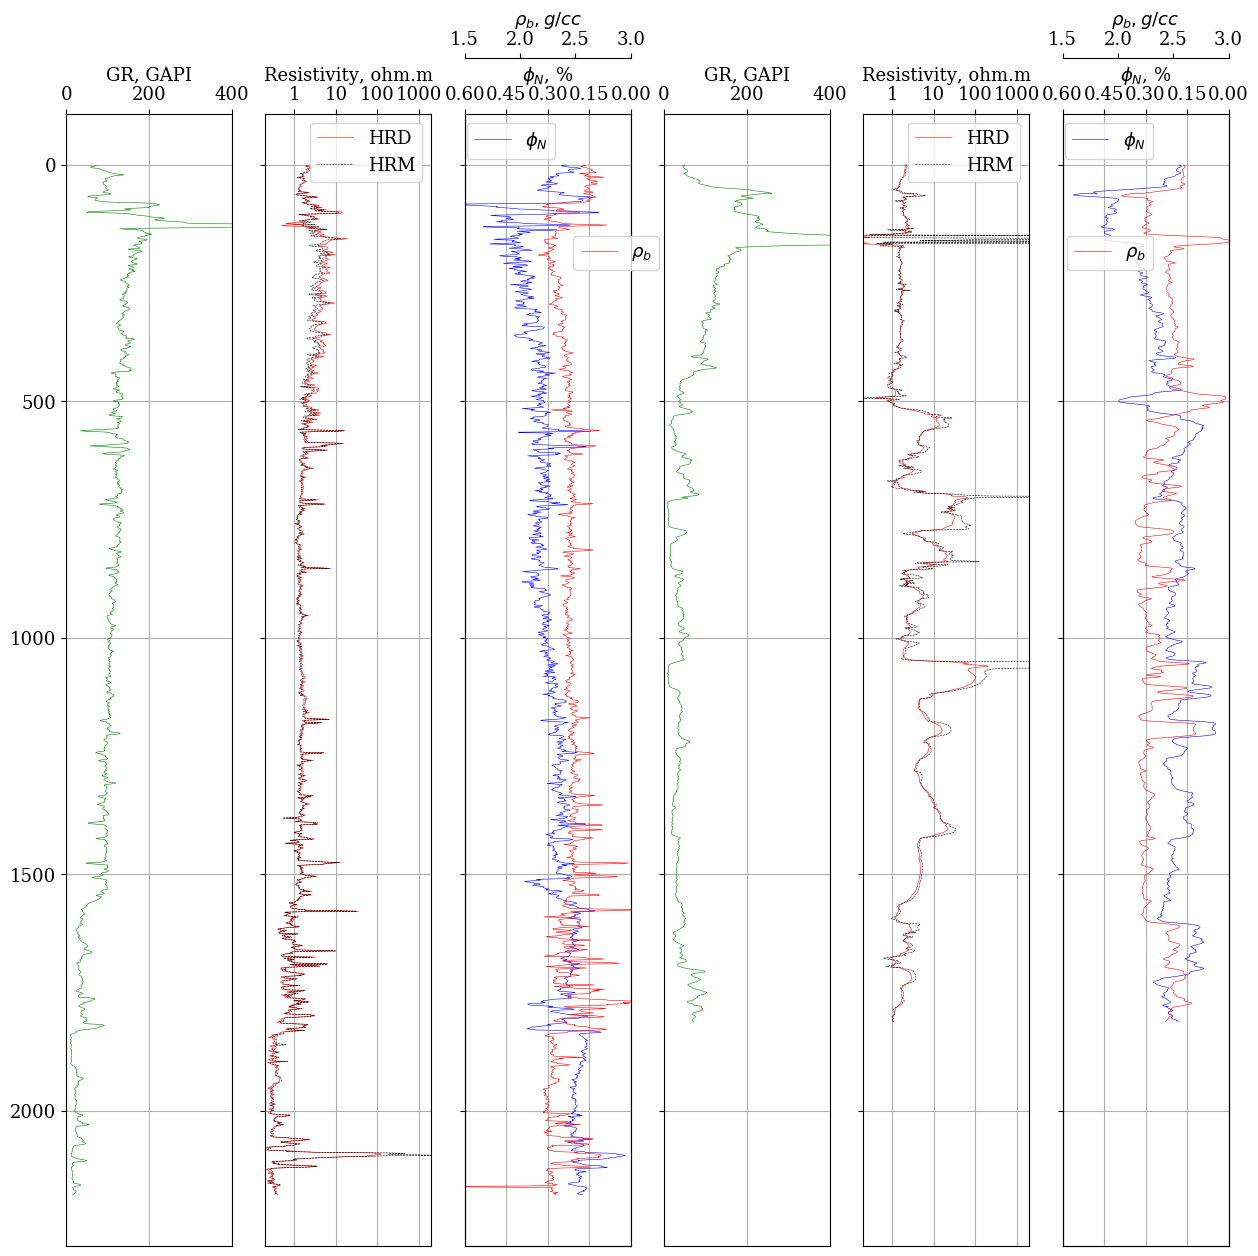

In [34]:
df33_2 = df3_DTS_2.reset_index()
plotalllogs1(df33_2, test_bot1)

In [35]:
#RFR Model for top section of the log
rf3_DTS = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, min_samples_split=10, random_state=10, max_leaf_nodes=500)

#Model Fit
RF_bot_DTS = rf3_DTS.fit(X_DTS_bot, y_DTS_bot)

#Model prediction
X_DTS_bot = np.asarray(test_bot[feat_b])
DTS_bot = RF_bot_DTS.predict(X_DTS_bot)

#Replacing results in main result vector
test_bot[DTS] = DTS_bot
test[DTS].loc[9275:11088] = test_bot[DTS]

D:\Software\Python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Error Calculation

In [36]:
#Predict Array
predict = test.sample(frac = 0.19999, random_state=100)
predict

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,LOG_RDEEP,LOG_RMED,DTC,DTS
4045,8.6250,0.1546,10.4917,2.1043,2.1170,8.2556,2.4944,0.323108,0.325721,76.658821,140.494704
5061,8.6250,0.0559,5.5234,7.2741,8.0130,8.3812,2.6380,0.861779,0.903795,61.736036,111.378449
1573,8.5781,0.2590,28.0473,0.3102,0.3055,5.0349,2.1869,-0.508358,-0.514989,98.348017,191.560926
9314,8.6250,0.2341,83.4760,1.5044,1.5746,7.9771,2.5930,0.177363,0.197170,83.617479,166.798526
8050,8.6250,0.0757,17.7993,4.0076,5.1776,8.0170,2.5972,0.602884,0.714128,65.410035,120.434999
...,...,...,...,...,...,...,...,...,...,...,...
892,8.5469,0.2293,32.3598,0.4290,0.3906,4.9725,2.2384,-0.367543,-0.408268,92.269190,166.354694
5173,8.6250,0.0894,9.7679,4.0911,4.6793,8.4620,2.5524,0.611840,0.670181,66.291329,118.295564
3673,8.6250,0.0716,8.1372,4.8414,5.4241,8.3024,2.6051,0.684971,0.734328,64.124368,118.101325
3259,8.6719,0.0565,4.6742,5.4697,7.1687,8.5994,2.6090,0.737964,0.855440,62.053908,111.382457


In [37]:
#Error for DTC Model
mse1 = mean_squared_error(real.DTC, predict.DTC)
rmse1 = np.sqrt(mse1)
rmse1

20.390341719081952

In [38]:
#Error for DTS Model
mse2 = mean_squared_error(real.DTS, predict.DTS)
rmse2 = np.sqrt(mse2)
rmse2

58.07798259728228

In [39]:
#Average error for both models
mse = (mse1 + mse2)/2
rmse = np.sqrt(mse)
print('Combined RMSE = ',rmse)

Combined RMSE =  43.524809580233416


In [40]:
#RMSE calculation does not represent real RMSE as the indeces are mixed. Best what we can do is to sort the predicted and real points and measure RMSE
#Error for DTC Model
rmse1_sort = np.sqrt(mean_squared_error(sorted(real.DTC), sorted(predict.DTC)))
rmse1_sort

2.0696044263046445

In [41]:
#Error for DTS Model
rmse2_sort = np.sqrt(mean_squared_error(sorted(real.DTS), sorted(predict.DTS)))
rmse2_sort

12.895861746293201

In [42]:
mse1_sort = mean_squared_error(sorted(real.DTC), sorted(predict.DTC))
mse2_sort = mean_squared_error(sorted(real.DTS), sorted(predict.DTS))

In [43]:
#Average error for both models
mse_sort = (mse1_sort + mse2_sort)/2
rmse_sort = np.sqrt(mse_sort)
print('Combined RMSE = ',rmse_sort)

Combined RMSE =  9.235434820864908


### Results plots

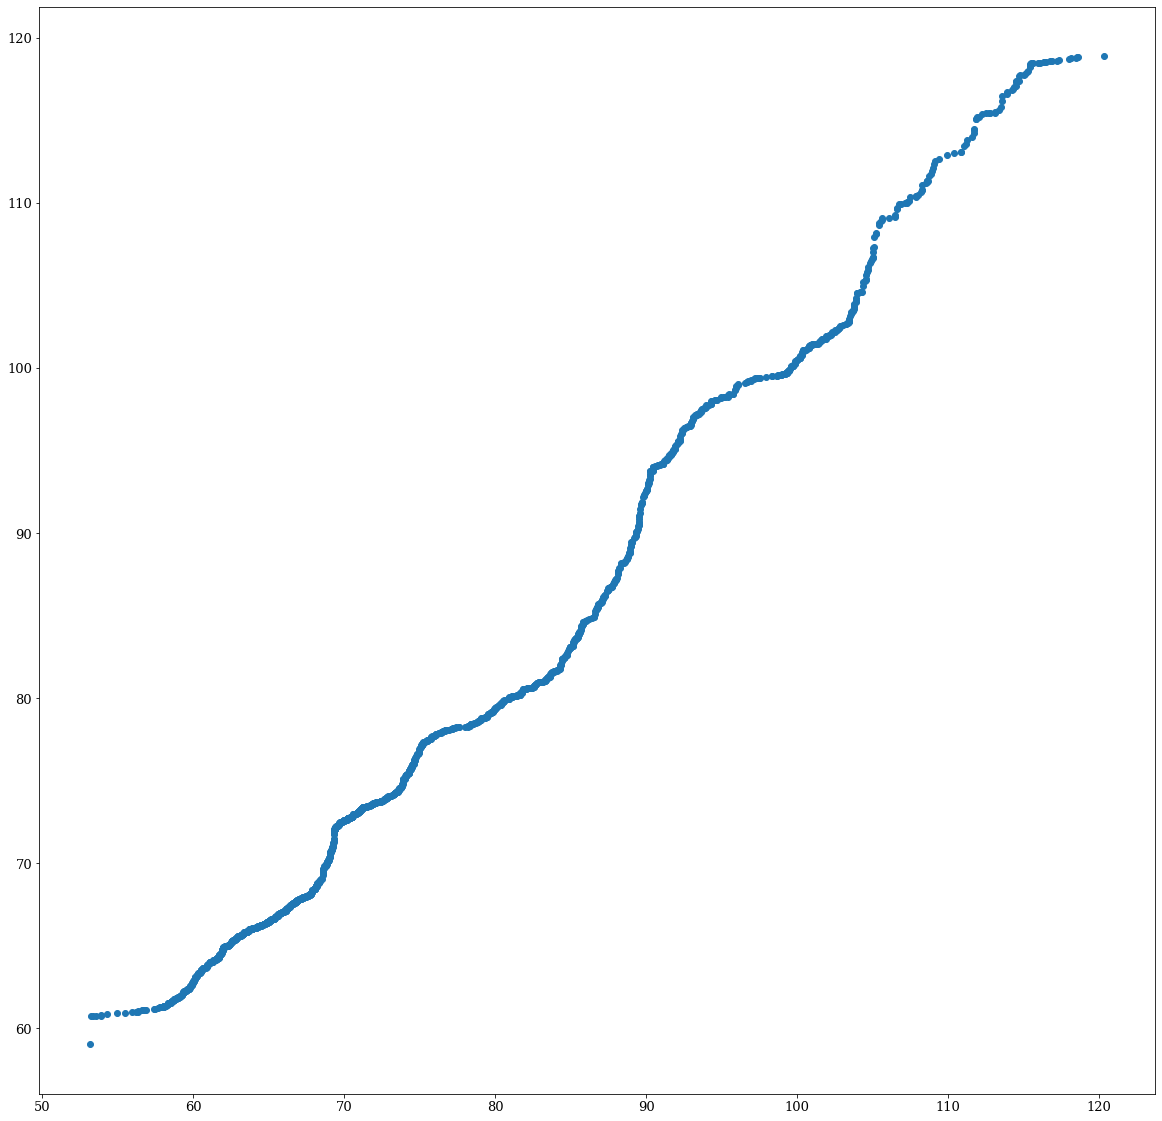

In [44]:
pylab.rcParams.update({'font.size': 13, 'font.family': 'serif', 'figure.figsize': (20,20)})
plt.scatter(sorted(real.DTC), sorted(predict.DTC))

(0, 350)

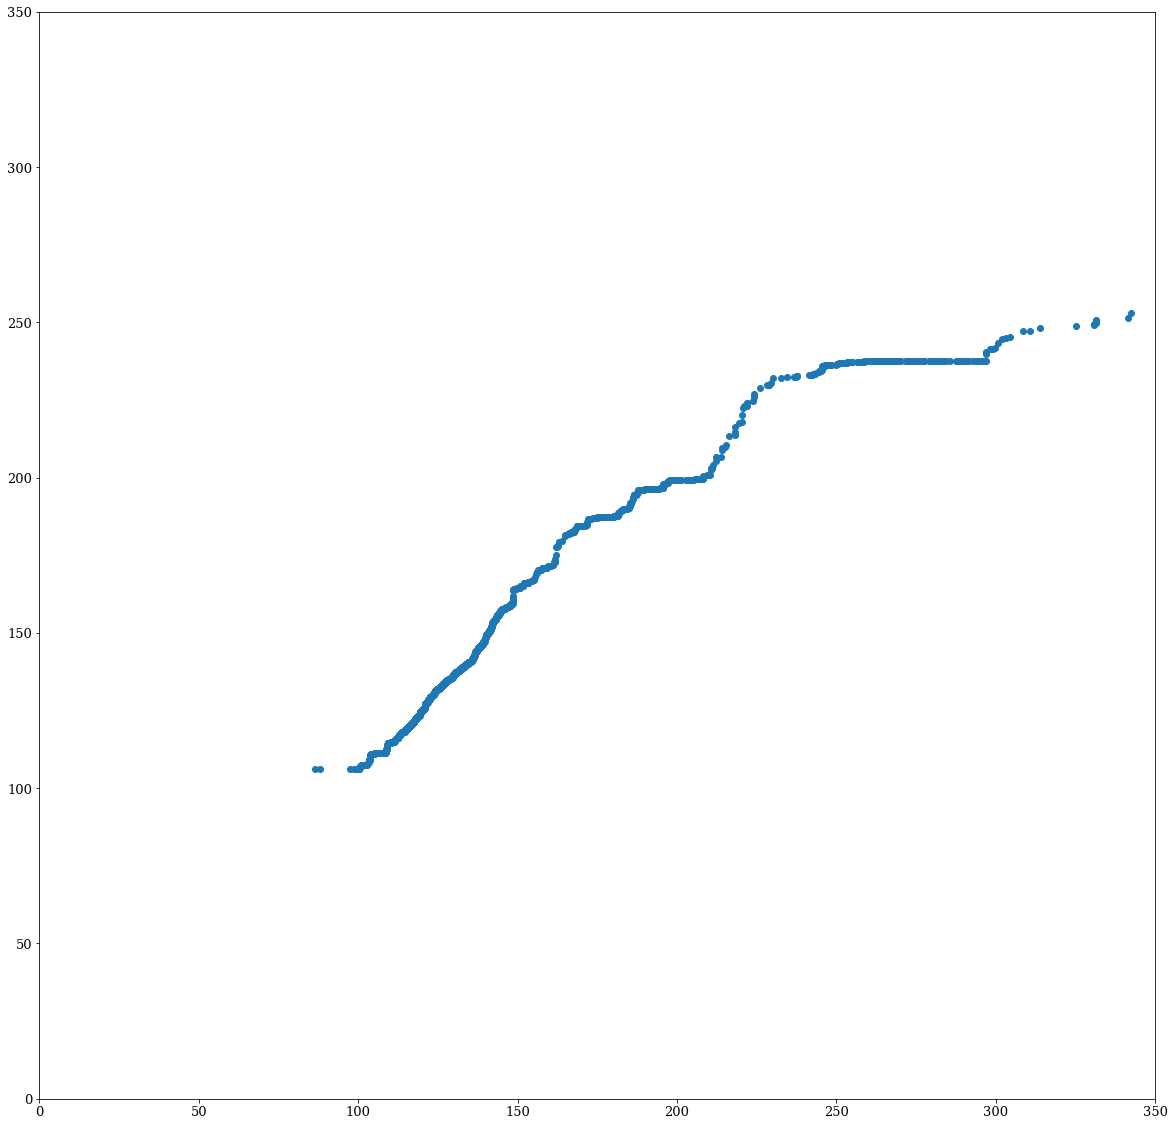

In [45]:
plt.scatter(sorted(real.DTS), sorted(predict.DTS))
plt.xlim(0,350)
plt.ylim(0,350)

### Bonus part: We screened test data that contains 11088 observations to keep only those rows that contained same rows as in real dataset based on columns 'CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN'. Then we removed duplicates and rearranged the real dataset so that it is sorted by a column 'HRD'. Then we assigned the index from screened test data to real data and saved it as a new sorted real results csv. This allowed us to accurately calculate the RMSE. The cell 46 shows how screening is done. The rest was done in excel.

In [46]:
#test1 = test[all_feat]
#real1 = real[all_feat]
#real1 = np.asarray(real1)
#test1 = np.asarray(test1)
#test2 = test

#rows = np.zeros([len(test2),1])

#for n in range(len(test1)):
#    t = test1[n,[0]] + test1[n,[1]] + test1[n,[2]] + test1[n,[3]] + test1[n,[4]] + test1[n,[5]] + test1[n,[6]]
#    for i in range(len(real1)):
#        r = real1[i,[0]] + real1[i,[1]] + real1[i,[2]] + real1[i,[3]] + real1[i,[4]] + real1[i,[5]] + real1[i,[6]]
#        if (t - r) == 0:
#            rows[n] = 1
#            break


#test2['rows'] = rows

#test2 = test2.drop(test2[test2['rows']==0].index)

#test2.to_csv('test20.csv', index=True)

In [47]:
real1 = pd.read_csv('Data/Data3_1_2020/real_sorted.csv')
predict1 = test.loc[real1.Index]
predict1

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,LOG_RDEEP,LOG_RMED,DTC,DTS
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,-0.164627,-0.214030,110.467374,237.386315
11,8.5469,0.3552,43.5194,0.5678,0.4524,6.0343,2.2173,-0.245805,-0.344477,106.402231,236.089899
14,8.6016,0.3946,61.3424,0.6808,0.6074,6.9973,2.2859,-0.166980,-0.216525,118.737505,237.541348
20,8.5625,0.3861,65.5698,0.8300,0.7273,6.7881,2.3503,-0.080922,-0.138286,115.710171,237.541348
26,8.5469,0.3613,60.6493,0.8312,0.7311,7.2742,2.3296,-0.080294,-0.136023,113.870973,237.541348
...,...,...,...,...,...,...,...,...,...,...,...
11055,8.7813,0.2263,90.8975,1.3242,1.3015,6.9199,2.5202,0.121954,0.114444,85.072585,166.918596
11072,8.7500,0.2071,70.2187,1.1162,1.0900,6.6439,2.4714,0.047742,0.037426,81.164914,149.490852
11073,8.7500,0.2038,72.9917,1.0984,1.0671,6.8284,2.4799,0.040761,0.028205,81.014897,153.154797
11074,8.7813,0.2023,74.3237,1.0735,1.0270,6.8848,2.4836,0.030802,0.011570,81.181831,153.530857


In [48]:
real1

,Index,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,108.2227,263.3599
1,11,8.5469,0.3552,43.5194,0.5678,0.4524,6.0343,2.2173,103.9043,259.4915
2,14,8.6016,0.3946,61.3424,0.6808,0.6074,6.9973,2.2859,105.6516,257.7589
3,20,8.5625,0.3861,65.5698,0.8300,0.7273,6.7881,2.3503,105.4278,263.1790
4,26,8.5469,0.3613,60.6493,0.8312,0.7311,7.2742,2.3296,93.1276,262.1628
...,...,...,...,...,...,...,...,...,...,...
1971,11055,8.7813,0.2263,90.8975,1.3242,1.3015,6.9199,2.5202,84.7845,139.6637
1972,11072,8.7500,0.2071,70.2187,1.1162,1.0900,6.6439,2.4714,85.3729,136.6123
1973,11073,8.7500,0.2038,72.9917,1.0984,1.0671,6.8284,2.4799,85.1816,135.1757
1974,11074,8.7813,0.2023,74.3237,1.0735,1.0270,6.8848,2.4836,84.9795,132.9758


In [49]:
mse1 = mean_squared_error(real1.DTC, predict1.DTC)
mse2 = mean_squared_error(real1.DTS, predict1.DTS)
mse = (mse1 + mse2)/2

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse = np.sqrt(mse)
rmse

13.55306839592406

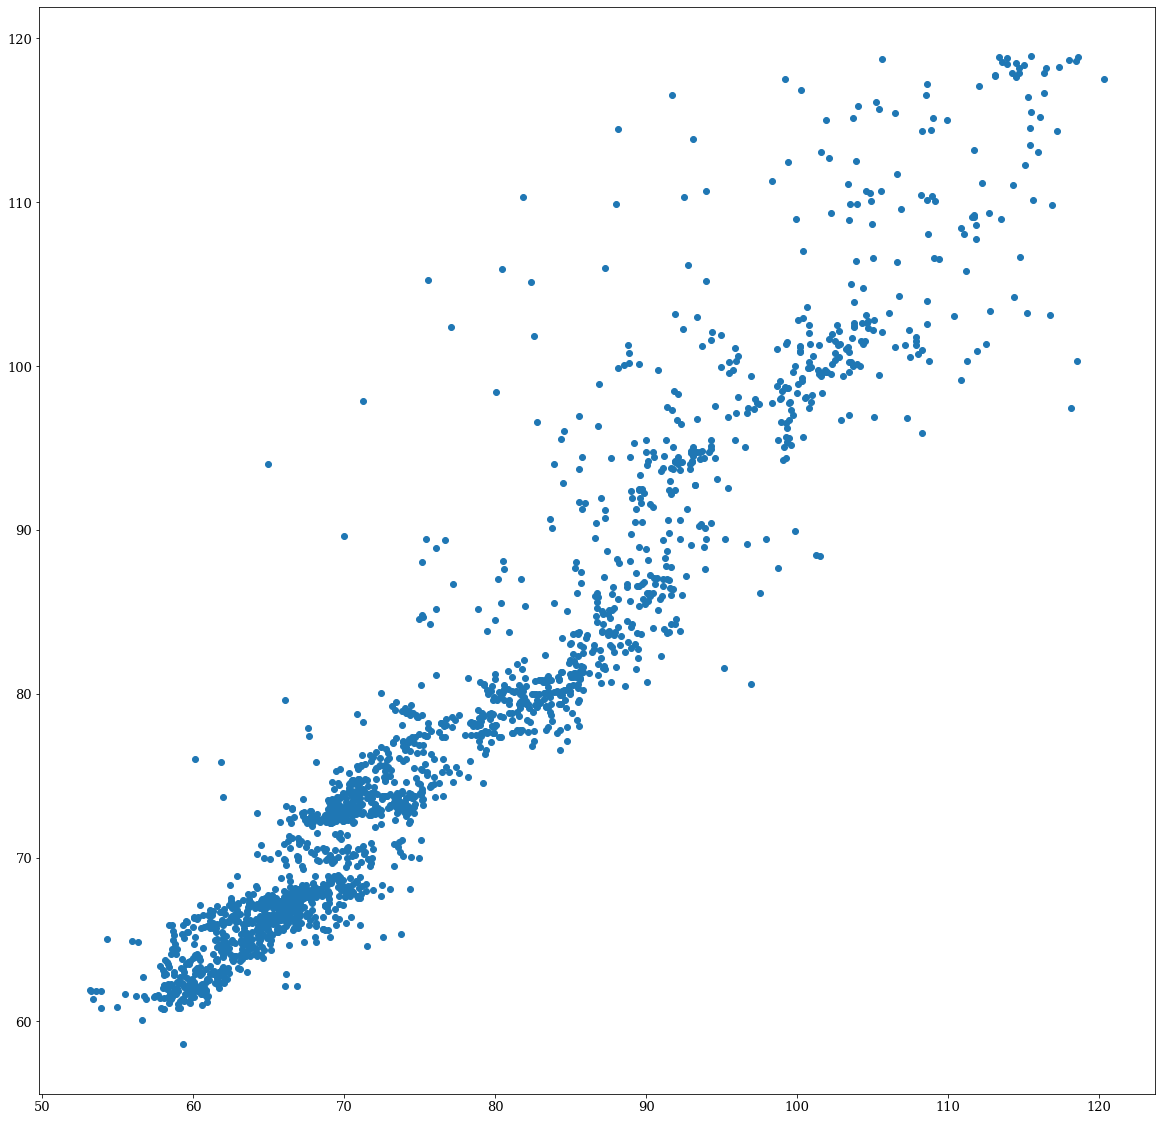

In [50]:
plt.scatter(real1.DTC, predict1.DTC)

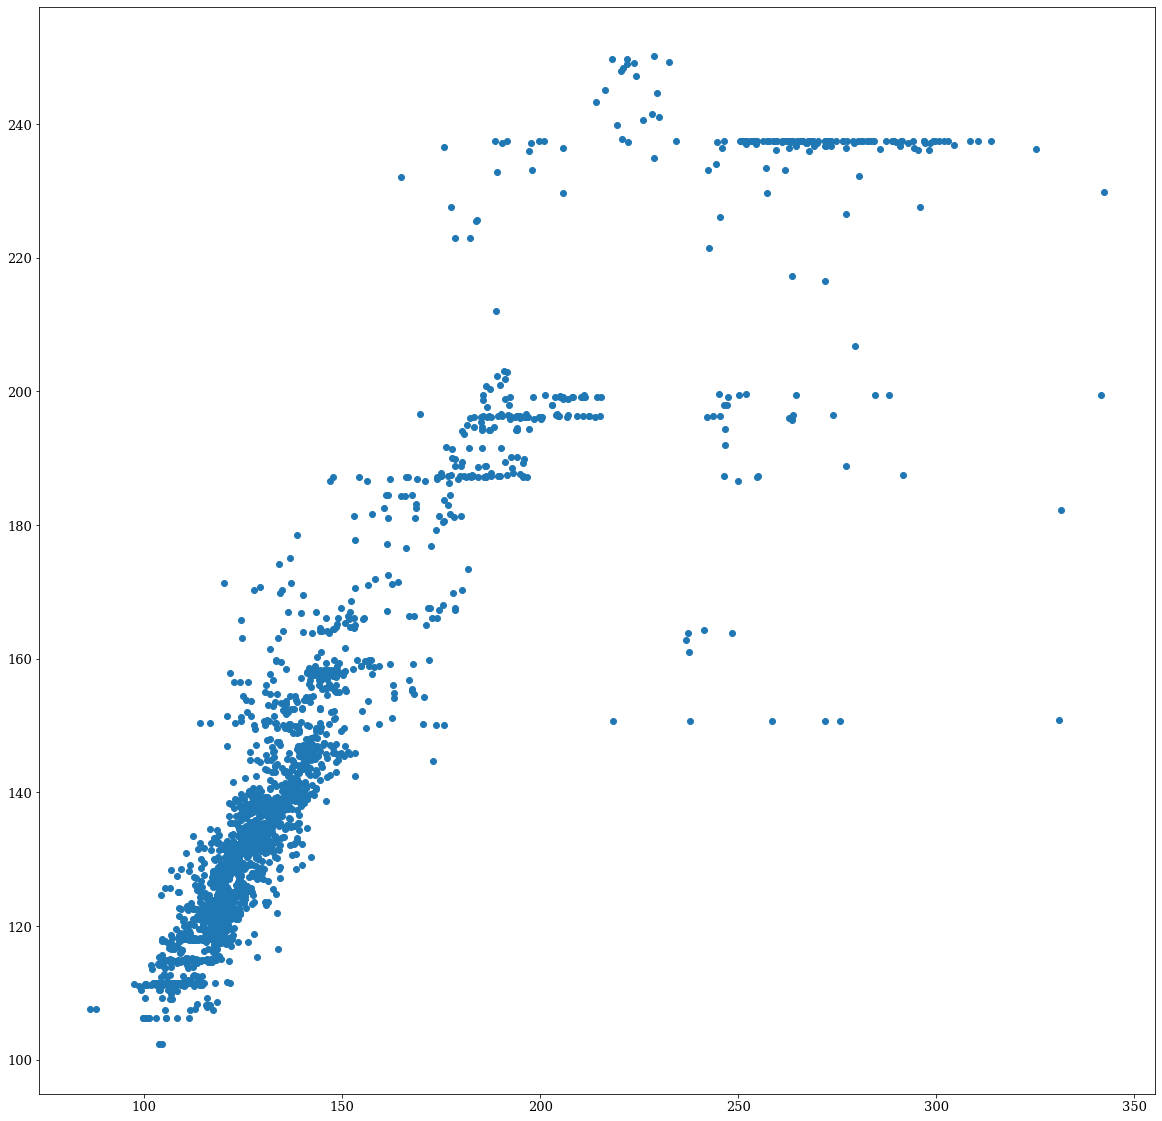

In [51]:
plt.scatter(real1.DTS, predict1.DTS)

In [52]:
print('Total RMSE is ', rmse)

Total RMSE is  13.55306839592406


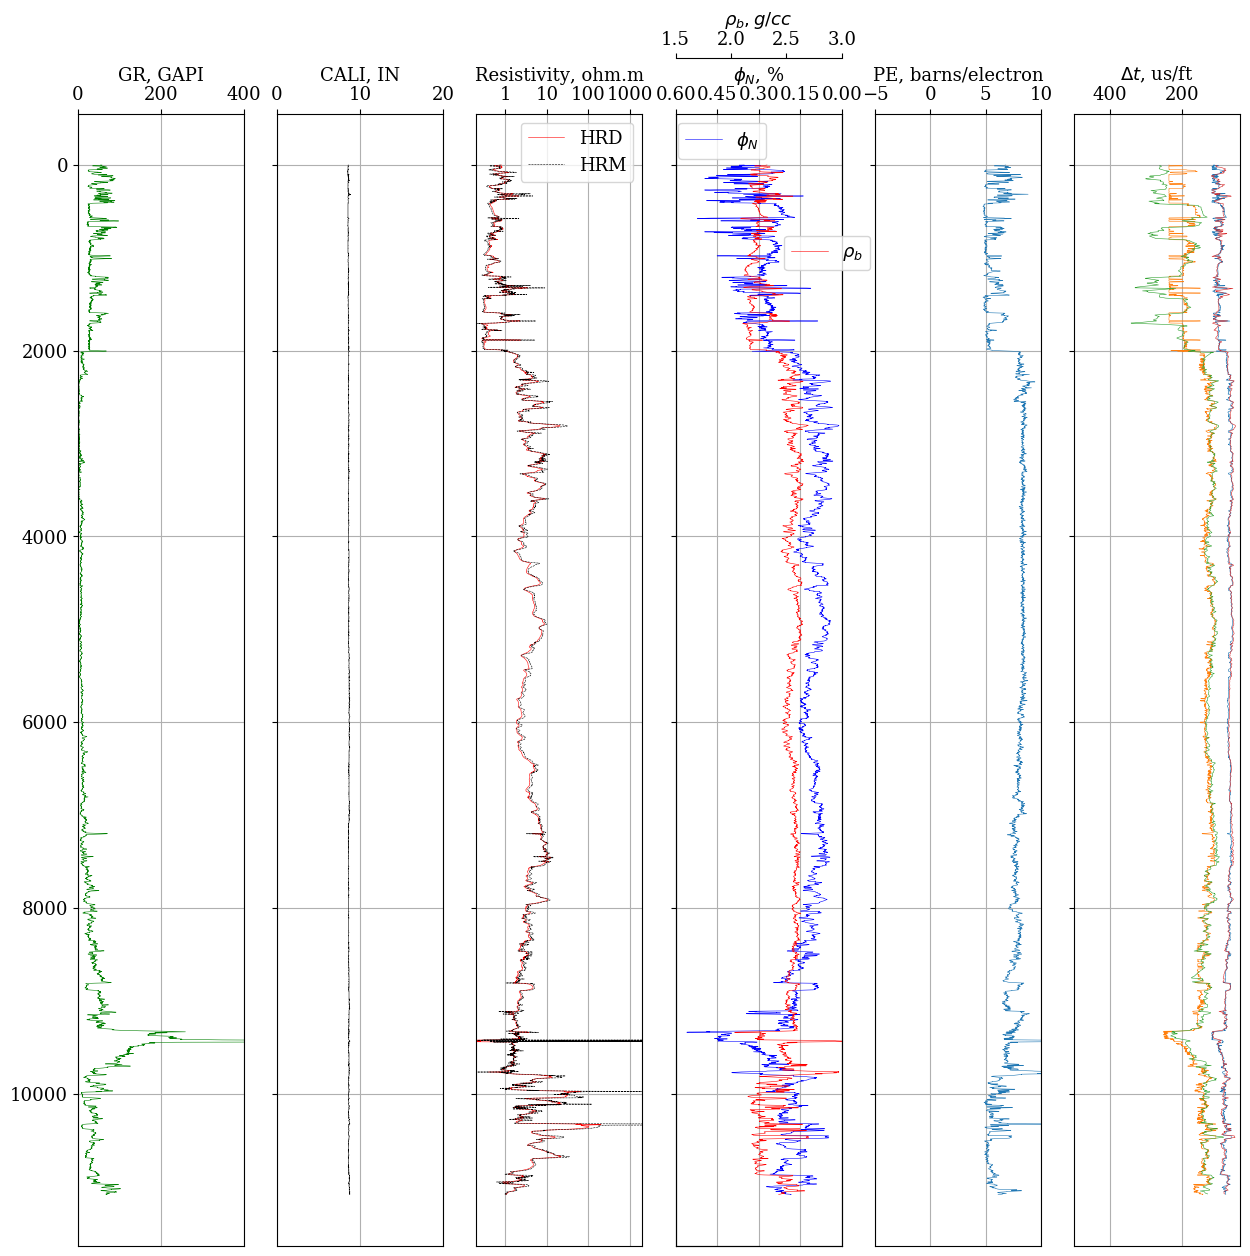

In [53]:
def plotalllogs2(dataframe, real):
#=============================================================================    
    tracks=6
    linewidth=0.4
    ## Gamma Ray
    trackGR=0 #Gamma Ray
    ## Gamma Ray
    trackCALI=1 #Gamma Ray
    ## Resistivity
    trackRes=2
    ## Porosity
    trackPOR = 3
    ## PEF
    trackPE = 4 
    ## DTC
    trackDTC=5
#=============================================================================    
    pylab.rcParams.update({'font.size': 13, 'font.family': 'serif', 'figure.figsize': (10,20)})
    fig,axes = plt.subplots(1,tracks,sharey=True,figsize=(15,15), dpi=100) ##sharey: share y axis
    fig.gca().invert_yaxis()
# =============================================================================
#================================================
    ## GR
    ax1 = axes[trackGR]
    ax1.grid(which='both')
    ax1.plot(dataframe[GR],dataframe.index, label='GR', color='green', lw=linewidth)
    ax1.set_xlabel('GR, GAPI')
    ax1.set_xlim(0,400)
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    ## CALI
    ax2 = axes[trackCALI]
    ax2.grid(which='both')
    ax2.plot(dataframe[CALI],dataframe.index, label='CALI', color='black', lw=linewidth)
    ax2.set_xlabel('CALI, IN')
    ax2.set_xlim(0,20)
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')    
   
    # Resistivity   
    ax3 = axes[trackRes]
    ax3.set_xscale('log')
    ax3.grid(which='both')
    ax3.plot(dataframe[RDEEP],dataframe.index, label=RDEEP, color='red', lw=linewidth)
    ax3.plot(dataframe[RMED],dataframe.index, label=RMED,color='black', ls = '--', lw=linewidth)
    ax3.set_xlabel('Resistivity, ohm.m')
    ax3.legend(loc=1)
    ax3.set_xlim(0.2,2000)
    ax3.xaxis.set_ticks_position('top')
    ax3.xaxis.set_label_position('top')
    ax3.set_xticks([1, 10, 100, 1000])
    ax3.xaxis.set_major_formatter(ScalarFormatter())
# =============================================================================

    ## RHOB
    ax4 = axes[trackPOR].twiny()
    ax4.plot(dataframe[RHOB],dataframe.index, label=r'$\rho_b$', color='red', lw=linewidth)
    ax4.set_xlabel(r'$\rho_b, g/cc$')
    ax4.set_xlim(1.5,3)
    #ax4.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])
    ax4.spines['top'].set_position(('outward', 40))
    #ax4.spines['top'].set_edgecolor('red')
    ax4.xaxis.set_ticks_position('top') # set the position of the second x-axis to top
    #ax4.tick_params(axis='x', colors='red')
    ax4.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax4.legend(bbox_to_anchor=(0.6, .9))
    ##NPHI
    ax5 = axes[trackPOR]
    ax5.grid(which='both')
    ax5.plot(dataframe[CNS],dataframe.index, label=r'$\phi_N$', color='blue', lw=linewidth)
    ax5.set_xlim(0.60, 0)
    ax5.set_xlabel(r'$\phi_N$, %') 
    ax5.legend(bbox_to_anchor=(0.6, 1))
    ax5.xaxis.set_label_position('top') # set the position of the second x-axis to top
    ax5.xaxis.set_ticks_position('top')
    ax5.set_xticks([0.6, 0.45, 0.3, 0.15, 0])
    ##PE
    ax6 = axes[trackPE]
    ax6.grid(which='both')
    ax6.plot(dataframe[PE],dataframe.index, label=PE, lw=linewidth)
    ax6.set_xlabel('PE, barns/electron')
    ax6.set_xlim(-5,10)
    ax6.xaxis.set_ticks_position('top')
    ax6.xaxis.set_label_position('top')  
    
    ## DTC & DTS
    ax7 = axes[trackDTC]
    ax7.grid(which='both')
    ax7.plot(dataframe[DTC],dataframe.index, label=DTC, lw=linewidth)
    ax7.plot(dataframe[DTS],dataframe.index, label=DTS, lw=linewidth)
    ax7.plot(real[DTS],real.Index, label=DTS, lw=linewidth)
    ax7.plot(real[DTC],real.Index, label=DTC, lw=linewidth)
    ax7.set_xlabel(dt)
    ax7.set_xlim(500,40)
    ax7.xaxis.set_ticks_position('top')
    ax7.xaxis.set_label_position('top')
    
plotalllogs2(test,real1)

In [54]:
real1

,Index,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,108.2227,263.3599
1,11,8.5469,0.3552,43.5194,0.5678,0.4524,6.0343,2.2173,103.9043,259.4915
2,14,8.6016,0.3946,61.3424,0.6808,0.6074,6.9973,2.2859,105.6516,257.7589
3,20,8.5625,0.3861,65.5698,0.8300,0.7273,6.7881,2.3503,105.4278,263.1790
4,26,8.5469,0.3613,60.6493,0.8312,0.7311,7.2742,2.3296,93.1276,262.1628
...,...,...,...,...,...,...,...,...,...,...
1971,11055,8.7813,0.2263,90.8975,1.3242,1.3015,6.9199,2.5202,84.7845,139.6637
1972,11072,8.7500,0.2071,70.2187,1.1162,1.0900,6.6439,2.4714,85.3729,136.6123
1973,11073,8.7500,0.2038,72.9917,1.0984,1.0671,6.8284,2.4799,85.1816,135.1757
1974,11074,8.7813,0.2023,74.3237,1.0735,1.0270,6.8848,2.4836,84.9795,132.9758


### Output Files

In [55]:
submission = pd.DataFrame([])
submission[DTC] = test[DTC]
submission[DTS] = test[DTS]
submission.to_csv('Rock_Abusers_submission_'+str(rmse)+'.csv', index=False)